In [1]:
import gym
import numpy as np
from itertools import product

env = gym.make('Acrobot-v1')

state_space = env.observation_space
n_state_feat = state_space.shape[0]

print("n_state_feat",n_state_feat)

action_space = env.action_space
n_action = action_space.n
actions = np.asarray(range(n_action))
print(actions)
print("n_actions",n_action)
# print("action space",action_space)

#parameters
epsilon = 5e-2 # probability of choosing a random action (changed from original value of 0.0)
alpha = 1e-5 # learning rate
lambda_ = 0.9 # trace decay rate
gamma = 1 # discount rate

order = 3

k = n_state_feat

d = (order+1) ** k

w = np.zeros((d,n_action))

combinations = None
combinations_generated = False



n_state_feat 6
[0 1 2]
n_actions 3


In [2]:
iterations = 500

In [3]:
def get_feature(env, state, order=5, k=4):
    
    global combinations, combinations_generated
    
#     Clipped State
    
    low = env.observation_space.low
    high = env.observation_space.high
    
    clipped = np.clip(state, low, high)
    
    # Normalize the state
    normalized = (clipped - low) / (high - low)
    
    
    # Compute Fourier-Basis features
    if combinations_generated == False:
        combinations = np.array(list(product(range(order + 1), repeat = k)))
        combinations_generated = True
        
    features = np.cos(np.pi * np.matmul(combinations, np.expand_dims(normalized, axis=1)))
    
    return np.asarray(features)
        

def get_pi(pi,q,n_action, epsilon = 0.05):
    
    a_star = np.argwhere(q[:] == np.amax(q[:])).flatten()
    
    num_a = len(a_star)
    
    y  = (epsilon/n_action)
    x = ((1-epsilon)/num_a)+ y

    for a in range(n_action):

        if(a in a_star):
            pi[a] = x
        else:
            pi[a] = y
    return pi

def update_q(q , w , env , state , actions ,  order = 5 , k = 4):
    
    x = np.squeeze(get_feature(env,state, order = order, k = k))

    for a in actions:
        q[a] = w[:,a].dot(x)

    return (q,x)

In [4]:
def sarsa_lambda(env, w , n_state_feat , actions, n_action, n_dims , alpha , lambda_ , epsilon , gamma, iterations,order,k):
    events = 10
    hist_len = np.zeros((events,iterations))
    for event in range(events):
        print("Event is ",event)
        #Loop over episodes

        ##################Start########################

        q = np.zeros(n_action) #need to be changed as n_state should be a vector

        pi = np.zeros(n_action)
        
        w = np.zeros((n_dims,n_action))

        for iteration in range(iterations): #Looping for each episode

            s = env.reset()

            done = False

            q , x = update_q(q, w, env, s, actions,  order, k) # updating q

            pi = get_pi(pi,q,n_action, epsilon)

            a = np.random.choice(actions , p = pi)

            z = np.zeros(n_dims) # eligibility vector

            Q_old = 0 # scalar

            episode_length = 0

            while not done:
                episode_length +=1

                # Perform the action
                s_dash, R, done, _ = env.step(a) #observing R and S'

                # Next Action
                q_dash , x_dash = update_q(q, w, env, s_dash, actions,  order, k) # updating q

                pi = get_pi(pi,q_dash,n_action, epsilon)

                a_dash = np.random.choice(actions,p = pi)

                Q = w[:,a].dot(x)

                Q_dash = w[:,a_dash].dot(x_dash)

                delta = R + gamma * Q_dash - Q           

                z = gamma * lambda_* z + (1 - alpha*gamma*lambda_*(z.dot(x))) * x 

                w[:,a] = w[:,a] + alpha * ( delta + Q - Q_old ) * z - alpha * ( Q - Q_old ) * x

                Q_old = Q_dash

                x = x_dash
                a = a_dash

            print("length is ",episode_length)
            hist_len[event,iteration] = episode_length
        print("Episode_lengths",hist_len[event,:])
    return hist_len

In [5]:
episode_lengths_history = sarsa_lambda(env, w , n_state_feat , actions, n_action, d , alpha , lambda_ , epsilon , gamma, iterations,order,k)

Event is  0
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  273
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  417
length is  500
length is  500
length is  500
length is  500
length is  500
length is  496
length is  500
length is  50

length is  500
length is  500
length is  500
length is  500
length is  355
length is  475
length is  500
length is  500
length is  500
length is  500
length is  500
length is  385
length is  500
length is  500
length is  500
length is  500
length is  500
length is  439
length is  319
length is  500
length is  366
length is  336
length is  495
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  407
length is  500
length is  400
length is  500
length is  356
length is  500
length is  333
length is  500
length is  298
length is  500
length is  463
length is  228
length is  500
length is  500
length is  500
length is  444
length is  500
length is  425
length is  500
length is  316
length is  384
length is  271
length is  436
length is  252
length is  221
length is  291
length is  294
length is  209
length is  131
length is  277
length is  274
length is  202
length is  180
length is  418
length is 

length is  500
length is  500
length is  500
length is  500
length is  500
length is  254
length is  377
length is  500
length is  500
length is  500
length is  500
length is  500
length is  212
length is  178
length is  392
length is  500
length is  288
length is  236
length is  310
length is  283
length is  228
length is  179
length is  177
length is  224
length is  149
length is  500
length is  500
length is  220
length is  176
length is  458
length is  477
length is  255
length is  199
length is  219
length is  207
length is  265
length is  162
length is  179
length is  211
length is  135
length is  129
length is  188
length is  209
length is  245
length is  333
length is  295
length is  191
length is  205
length is  245
length is  199
length is  214
length is  261
length is  186
length is  183
length is  215
length is  195
length is  181
length is  160
length is  158
length is  144
length is  500
length is  230
length is  233
length is  148
length is  185
length is  181
length is 

length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  409
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  419
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  417
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  391
length is  500
length is 

length is  500
length is  473
length is  500
length is  500
length is  500
length is  463
length is  362
length is  304
length is  282
length is  500
length is  500
length is  422
length is  500
length is  500
length is  263
length is  199
length is  500
length is  442
length is  220
length is  206
length is  237
length is  339
length is  237
length is  311
length is  192
length is  247
length is  181
length is  156
length is  192
length is  241
length is  221
length is  220
length is  195
length is  217
length is  251
length is  216
length is  328
length is  176
length is  252
length is  133
length is  226
length is  184
length is  364
length is  142
length is  199
length is  198
length is  270
length is  122
length is  184
length is  189
length is  194
length is  172
length is  186
length is  124
length is  187
length is  150
length is  117
length is  291
length is  171
length is  229
length is  159
length is  144
length is  315
length is  151
length is  190
length is  150
length is 

length is  500
length is  500
length is  500
length is  365
length is  500
length is  500
length is  500
length is  292
length is  500
length is  500
length is  331
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  376
length is  408
length is  290
length is  500
length is  500
length is  235
length is  178
length is  292
length is  479
length is  229
length is  318
length is  276
length is  388
length is  279
length is  308
length is  255
length is  406
length is  216
length is  249
length is  285
length is  377
length is  500
length is  321
length is  342
length is  227
length is  243
length is  288
length is  500
length is  500
length is  500
length is  253
length is  242
length is  201
length is  379
length is  204
length is  225
length is  369
length is  266
length is  276
length is  224
length is  251
length is  202
length is  204
length is  341
length is  256
length is  199
length is  257
length is  500
length is 

length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  493
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  346
length is  500
length is  500
length is  500
length is  500
length is  500
length is  355
length is  500
length is  373
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  415
length is  500
length is  500
length is  500
length is  500
length is  500
length is  491
length is  500
length is  500
length is  500
length is  500
length is  349
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is 

length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  471
length is  481
length is  500
length is  500
length is  500
length is  500
length is  267
length is  500
length is  500
length is  500
length is  500
length is  354
length is  379
length is  426
length is  500
length is  500
length is  465
length is  500
length is  500
length is  500
length is  295
length is  216
length is  500
length is  500
length is  500
length is  500
length is  500
length is  435
length is  500
length is  384
length is  496
length is  500
length is  500
length is  485
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  324
length is  283
length is  500
length is  373
length is  333
length is  375
length is  500
length is  500
length is  500
length is 

length is  500
length is  500
length is  500
length is  445
length is  500
length is  500
length is  500
length is  407
length is  358
length is  441
length is  336
length is  377
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  400
length is  470
length is  500
length is  500
length is  460
length is  322
length is  319
length is  390
length is  335
length is  466
length is  288
length is  201
length is  307
length is  283
length is  271
length is  218
length is  271
length is  251
length is  261
length is  342
length is  500
length is  337
length is  274
length is  316
length is  255
length is  166
length is  314
length is  240
length is  268
length is  253
length is  192
length is  223
length is  205
length is  240
length is  253
length is  244
length is  294
length is  294
length is  238
length is  271
length is  230
length is  232
length is  152
length is  288
length is  282
length is  185
length is  219
length is  252
length is 

length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  464
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  428
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is  485
length is  500
length is  500
length is  357
length is  500
length is  500
length is  500
length is  500
length is  500
length is  500
length is 

In [6]:
episode_lengths_avg = np.mean(episode_lengths_history, axis=0)
episode_lengths_std = np.std(episode_lengths_history, axis=0)

In [7]:
print(episode_lengths_avg)

[500.  497.3 500.  481.  485.5 469.2 473.9 440.5 464.  494.1 466.7 468.4
 468.3 465.9 465.5 469.9 478.8 458.1 389.2 436.7 389.4 435.4 421.5 394.6
 371.7 435.5 449.5 407.1 379.4 417.6 426.6 403.7 367.5 362.5 403.5 394.8
 385.6 398.2 417.3 404.  374.8 391.4 401.4 352.4 413.4 421.8 407.2 402.4
 379.3 377.8 381.4 386.8 370.4 354.7 400.1 357.4 351.8 332.7 338.7 337.3
 351.9 361.3 373.5 338.1 342.2 400.1 351.1 351.7 356.2 384.7 347.5 365.8
 341.4 369.1 318.5 357.3 347.5 339.6 293.8 360.4 360.9 359.3 343.5 317.2
 346.2 350.6 332.8 299.8 353.5 336.2 315.3 316.7 267.6 274.2 271.6 330.6
 312.  285.5 319.6 261.  315.1 301.4 341.6 334.3 309.7 354.  305.2 288.6
 284.4 357.8 292.3 289.6 318.7 322.4 252.6 312.6 289.  302.  330.9 300.9
 324.4 324.6 320.5 343.7 290.3 282.9 338.7 287.2 272.1 265.  281.3 329.1
 265.4 228.7 314.5 254.2 221.8 288.9 295.  269.4 321.8 292.8 351.3 294.5
 286.1 322.4 246.3 252.1 303.5 304.2 233.  273.8 268.7 267.8 263.1 226.2
 306.  257.  239.5 261.3 312.5 245.9 260.  306.  24

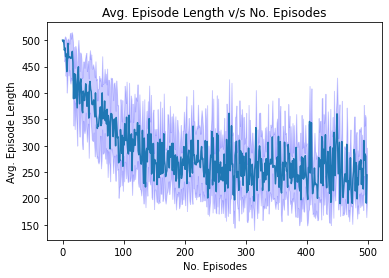

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.arange(iterations), episode_lengths_avg)
plt.fill_between(np.arange(iterations), episode_lengths_avg - episode_lengths_std / 2, \
                 episode_lengths_avg + episode_lengths_std / 2, color='blue', alpha=0.2)
plt.title('Avg. Episode Length v/s No. Episodes')
plt.xlabel('No. Episodes')
plt.ylabel('Avg. Episode Length')
plt.savefig("/home/sahil/Desktop/CS 687/Project/sarsa_lambda_acrobot.png")
plt.show()